## Experimental environment setup

### Library preparation

In [667]:
%matplotlib notebook

In [516]:
import time, os, io
from PIL import ImageGrab
from IPython.display import Image, display
import clipboard
from scipy import stats
from si_prefix import si_format
# %matplotlib widget

# conda install -c conda-forge widgetsnbextension
# pip install si-prefix

In [129]:
import pandas as pd
import numpy as np
from io import StringIO 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.close('all')

In [154]:
# def dataread (filename, splitkw = '!DATASTR!'):
#     with open(filename,'r') as file:
#         rawtxt = file.read()
#         splittxt = rawtxt.split(splitkw)    
#     return(splittxt)
# def filetoDFM (filename):
#     datatxt = dataread(filename = filename)
#     datastr = io.StringIO(datatxt[1])
#     DataFM = pd.read_csv(datastr, sep = '\t')
#     DataFM = DataFM.drop(DataFM.index[0])
#     DataFM = DataFM.astype(float)
#     return(DataFM, datatxt[0])

# def mean(lst):
#     return(sum(lst)/len(lst))
# def pltMaxMin(lst, pMF = 1.2):
#     pMin = mean(lst)-pMF*(max(lst)-min(lst))/2
#     pMax = mean(lst)+pMF*(max(lst)-min(lst))/2
#     return(pMin,pMax)

# def qcksubplt (DataFM, x_label, y_label, subpltTitle, linfit = False):
#     x = DataFM[x_label]
#     y = DataFM[y_label]

#     plt.scatter(x,y)
#     plt.ylim(pltMaxMin(y)[0], pltMaxMin(y)[1])
#     plt.xlim(pltMaxMin(x)[0], pltMaxMin(x)[1])
#     plt.rc('font', size=16)
#     plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 4))
#     plt.tick_params(axis='both', labelsize='medium')
#     plt.title(subpltTitle, size ='large')
#     plt.ylabel(y_label, fontsize='medium')
#     plt.xlabel(x_label, fontsize='medium')
#     plt.minorticks_on()
#     plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
#     plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#     plt.axhline(y=0, color='k')
#     plt.axvline(x=0, color='k')

#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     plt.text(0.05, 0.95, 'textstr', fontsize=14,
#         verticalalignment='top', bbox=props)

# def qckplt (fname, showheader = False):
#     data = filetoDFM(filename = fname)[0]
    
#     plt.close('all')
#     f = plt.figure(figsize=(12,10))

#     ax1 = plt.subplot(221)
#     qcksubplt(DataFM = data, x_label = 'IS', y_label = 'V1', subpltTitle = 'IV1c')

#     ax2 = plt.subplot(222)
#     qcksubplt(DataFM = data, x_label = 'Time', y_label = 'IS', subpltTitle = 'I_Bias')

# #     ax3 = plt.subplot(223)
# #     qcksubplt(DataFM = data, x_label = 'Time', y_label = 'IS', subpltTitle = 'I_Bias')
# #     ax4 = plt.subplot(224)
# #     qcksubplt(DataFM = data, x_label = 'IS', y_label = 'V1', subpltTitle = 'IVc')

#     f.tight_layout()
#     f.suptitle('file {}'.format(fname.split(r'DC')[1]), size = 'large')
#     f.subplots_adjust(top=0.90)
#     plt.show()
    
#     if showheader:
#         print(filetoDFM(filename = fname)[1])
#     else:
#         pass

In [658]:
def dataread (filename, splitkw = '!DATASTR!'):
    with open(filename,'r') as file:
        rawtxt = file.read()
        splittxt = rawtxt.split(splitkw)    
    return(splittxt)

def filetoDFM (filename):
    datatxt = dataread(filename = filename)
    datastr = io.StringIO(datatxt[1])
    DataFM = pd.read_csv(datastr, sep = '\t')
    DataFM = DataFM.drop(DataFM.index[0])
    DataFM = DataFM.astype(float)
    return(DataFM, datatxt[0])

######################################################################

def pltMaxMin(lst, pMF = 1.1):
    pMin = lst.mean()-pMF*(lst.max()-lst.min())/2
    pMax = lst.mean()+pMF*(lst.max()-lst.min())/2
    pPos = (lst.mean()-lst.min())*pMF+lst.min()
    return(pMin,pMax,pPos)

######################################################################

def qcksubplt(ax, dataFM, param_dict, x_label, y_label):
    out = ax.plot(dataFM[x_label], dataFM[y_label], **param_dict)

    ax.set_ylim(pltMaxMin(dataFM[y_label])[0], pltMaxMin(dataFM[y_label])[1])
    ax.set_xlim(pltMaxMin(dataFM[x_label])[0], pltMaxMin(dataFM[x_label])[1])
    ax.set_title('{} ({})'.format(y_label, x_label), size ='large')
    ax.set_ylabel(y_label, fontsize='medium')
    ax.set_xlabel(x_label, fontsize='medium')  

    ax.ticklabel_format(axis='both', style='sci', scilimits=(0, 4))
    ax.tick_params(axis='both', labelsize='medium')    
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    return out

######################################################################

def qckplt (fname, showheader = False):
    data = filetoDFM(filename = fname)[0]
    
    plt.close('all')
    plt.rc('font', size=14)
    
    fig, ax_lst = plt.subplots(1, 2, figsize=(9, 4))

    qcksubplt(ax_lst[0], data, {'marker':'.','color':'r'}, 'IS', 'V1')
    ax_lst[0].text(pltMaxMin(data['IS'],pMF=0)[2], pltMaxMin(data['V1'],pMF=1.8)[2], '$T = {}K, \Delta T = {}K$'.format(si_format(data['T8'].mean(), precision =2),si_format(data['T8'].max()-data['T8'].min(), precision =2)), fontsize=12)
    slopeP, interceptP, r_valueP, p_valueP, std_errP = stats.linregress(data['IS'][int(np.floor(data['IS'].size*3/16)):int(np.floor(data['IS'].size*5/16))],data['V1'][int(np.floor(data['V1'].size*3/16)):int(np.floor(data['V1'].size*5/16))])
    slopeN, interceptN, r_valueN, p_valueN, std_errN = stats.linregress(data['IS'][int(np.floor(data['IS'].size*11/16)):int(np.floor(data['IS'].size*13/16))],data['V1'][int(np.floor(data['V1'].size*11/16)):int(np.floor(data['V1'].size*13/16))])
    ax_lst[0].text(pltMaxMin(data['IS'],pMF=0)[2], pltMaxMin(data['V1'],pMF=1.6)[2], '$R_{} = {}\Omega/{}\Omega$'.format('{+/-}',si_format(slopeP, precision =2),si_format(slopeN, precision =2)), fontsize=12)
#     slopeA, interceptA, r_valueA, p_valueA, std_errA = stats.linregress(data['IS'],data['V1'])
#     ax_lst[0].text(pltMaxMin(data['IS'],pMF=0)[2], pltMaxMin(data['V1'],pMF=1.4)[2], '$R = {}\Omega$'.format(si_format(slopeA, precision =2)), fontsize=12)
    
    qcksubplt(ax_lst[1], data, {'marker':'.','color':'b'}, 'Time', 'IS')
    
    fig.tight_layout()
    fig.suptitle('file {}'.format(fname.split(r'DC')[1]), x = 0.8, y = 0.02, size = 'x-small')
    fig.subplots_adjust(top=0.8)
    
    plt.show()
    
    if showheader:
        print(filetoDFM(filename = fname)[1])

######################################################################

### Device detail

- ID: Q1D055B1
- Pre-experiment electrical performance
 - <s>N2: (7ba,6ba),</s> $R_{RT, 4pb} = 113k\Omega$, <font color="red">$R_{G, 6a} = 27k\Omega$ >> $131.5k\Omega$ at 8K</font>
 - N4: (3ab,4ba), $R_{RT, 4pb} = 121k\Omega$, $R_{G, 2pb} = 2M\Omega$ >> $14M\Omega$ at 8K
 - <s>N5: (2ab,1ab),</s> $R_{RT, 4pb} = 138k\Omega$, <font color="red">$R_{G, 1b} = 289\Omega$ >> $291\Omega$ at 8K</font>
 - N9: (12ab,11ab), $R_{RT, 4pb} = 94k\Omega$, $R_{G, 2pb} = OVFL$

 - $R_{coil} = 1.24k\Omega$
 - $R_{therm} = 1.056k\Omega$


- Device scheme
 - Type: 1D chain with 20 SQUIDs
 - Shunting capacitor C0: finger type capacitor, Pt-first.
 - C0 area: 
 - SQUID area: 
 - Junction area:
 - Oxidation:

### Fridge handling log


In [507]:
sampleID = 'D55B1'
# action = 'User: wsLu. Sample: {}. Roughing'.format(sampleID)
# action = 'ON Turbo @P1 = 2.47E-1'
# action = 'ON PT @P1 = 1.99E-3. ON HS-STILL, HS-MC'
# action = 'Test Cyro eff., t1hr @P1 = 5.41E-6'
# action = 'Add exchange gas thru v3'
# action = 'Pump coldtrap to P6 = 4.04E-1'
# action = 'Start Pulse_PreCool'
# action = 'Start Condense_wLN2'
action = 'base T'
# action = 'Warm up to RT'

Tlst = [47.9, 4.63, 0.887, 0.032, 0.039]
# Tlst = ['dont care']
flow = '0.29'
stillOut = '10'

tAbrStr = time.asctime()
actionStr = '\n\t'+action+'\n'
TPstr = '\tT[1,2,5,6,8]:\t{}\n'.format(Tlst)
misc = '\tFlow = {}, \tStill = {}%\n\n'.format(flow, stillOut)
clipboard.copy(tAbrStr+actionStr+TPstr+misc)

Tue Oct 29 00:31:11 2019
	base T, normal circulation
	T[1,2,5,6,8]:	[47.9, 4.63, 0.887, 0.032, 0.039]
	Flow = 0.29, 	Still = 10%

Mon Oct 28 22:15:51 2019
	base T, ON still 10%
	T[1,2,5,6,8]:	[47.9, 4.73, 0.563, 0.03, 0.037]
	Flow = 0.16, 	Still = 0%

Mon Oct 28 16:43:36 2019
	Start Condense_wLN2
	T[1,2,5,6,8]:	[49.7, 5.42, 5.93, 6.12, 7.0]
	Flow = 0.00, 	Still = 0%

Mon Oct 28 14:45:34 2019
	T[1,2,5,6,8]:	[54, 6.0, 6.6, 6.6, 8.0]
	Flow = 0.00, 	Still = 0%

Mon Oct 28 13:46:36 2019
	T[1,2,5,6,8]:	[58, 6.5, 7.4, 7.8, 8.9]
	Flow = 0.00, 	Still = 0%

Mon Oct 28 11:53:56 2019
    ON PT after all mixtures are collected. OFF still and lines as well.
	T[1,2,5,6,8]:	[122, 37, 36, 15, 25]
	Flow = 0.00, 	Still = 0%

Mon Oct 28 09:49:04 2019
    ON PT to hold T again, but it seems that T6 drops right after PT ON.
    Decided to OFF PT since less than 50% mixture were collected.
	T[1,2,5,6,8]:	[64, 10.5, 9.5, 1.32, 1.32]
	Flow = 0.00, 	Still = 10%

Mon Oct 28 09:35:43 2019
    OFF PT to expedite the collecting process.
	T[1,2,5,6,8]:	[45, 5.6, 4.5, 1.3, 1.3]
	Flow = 0.00, 	Still = 10%

Mon Oct 28 09:06:09 2019
	T8 = 330mK, which suggest that some heat spots exist in the system.
    ON HS-STILL, HS-MC, keep still 10% and warm up to collect mixture.
	T[1,2,5,6,8]:	[48, 4.69, 6.32, 0.38, 0.33]
	Flow = 0.10, 	Still = 10%

Mon Oct 28 07:45:03 2019
    For some reasons the cool down wasn't successful. Double checking. 
    Trying to add still 10% and see how it goes.
	T[1,2,5,6,8]:	[48, 4.69, 1.5, 0.77, 0.33]
	Flow = 0.09, 	Still = 0%

Sun Oct 27 20:51:16 2019
	Start Condense_wLN2
	T[1,2,5,6,8]:	[48, 5.2, 4.1, 6.7, 8.2]
	Flow = 0.00, 	Still = 0%

Sun Oct 27 20:49:36 2019
	Pump coldtrap to P6 = 4.04E-1
	T[1,2,5,6,8]:	[48, 5.2, 4.1, 6.7, 8.2]
	Flow = 0.00, 	Still = 0%

Sun Oct 27 20:43:59 2019
	Test Cyro eff., t1hr @P1 = 5.41E-6
	T[1,2,5,6,8]:	[48, 5.2, 4.1, 6.7, 8.2]
	Flow = 0.00, 	Still = 0%

Sat Oct 26 16:18:21 2019
	ON PT @P1 = 1.99E-3. ON HS-STILL, HS-MC
	T[1,2,5,6,8]:	[dont care]
	Flow = 0.00, 	Still = 0%

Sat Oct 26 12:55:05 2019
 	ON Turbo @P1 = 2.47E-1
 	T[1,2,5,6,8]:	[dont care]
	Flow = 0.00, 	Still = 0%

Sat Oct 26 12:20:00 2019
	User: wsLu. Sample: D55B1 revisit. Roughing
	T[1,2,5,6,8]:	[dont care]
	Flow = 0.00, 	Still = 0%


### Biasing scheme

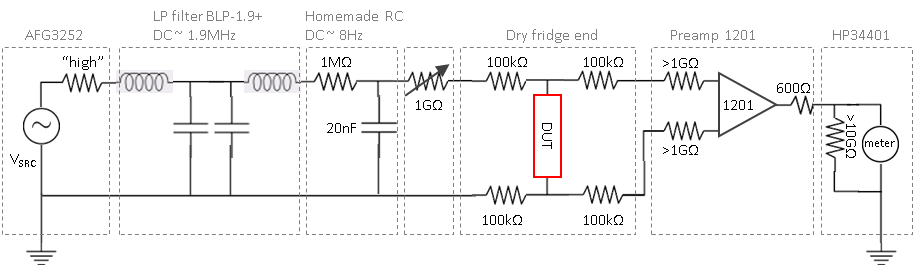

In [5]:
display(Image(filename=r'C:\Users\KelvinOX25\Documents\GitHub\DC meas\img\191026-183349.png'))

## Data acqusition

### IVc measurement at RT

- Q1D055B1N4_RT, R~125k$\Omega$

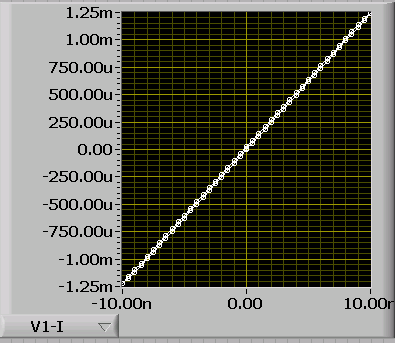

In [6]:
display(Image(filename=r'C:\Users\KelvinOX25\Documents\GitHub\DC meas\55B1_revist 1D chain\img\191026-184753.png'))

- Measure at intermediat T during cooldown

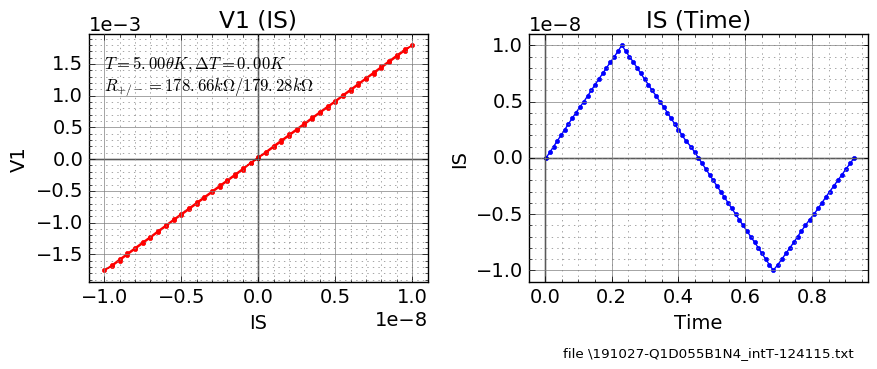

In [659]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191027-Q1D055B1N4_intT-124115.txt') 

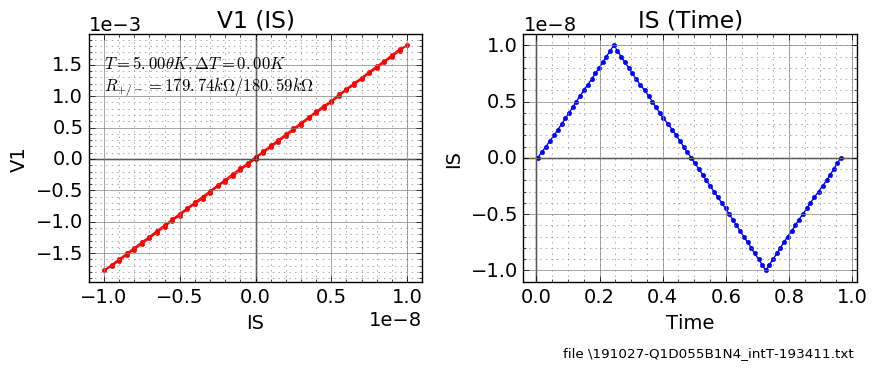

In [649]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191027-Q1D055B1N4_intT-193411.txt')

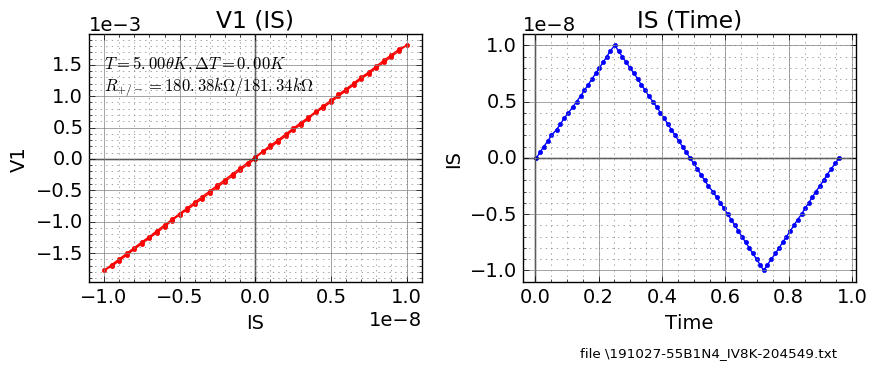

In [616]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191027-55B1N4_IV8K-204549.txt')

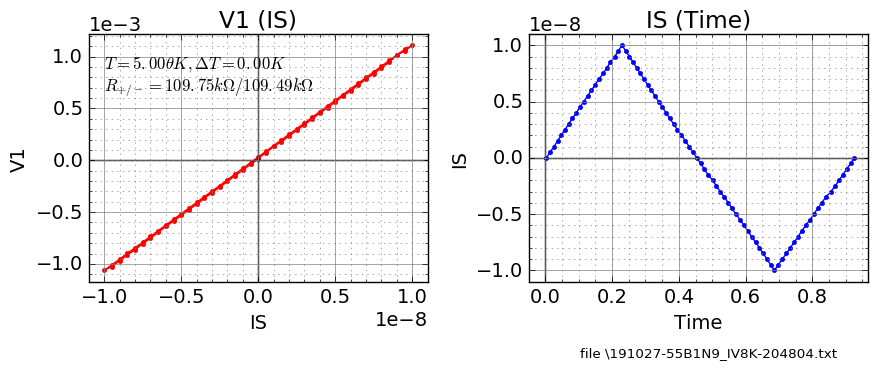

In [617]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191027-55B1N9_IV8K-204804.txt')

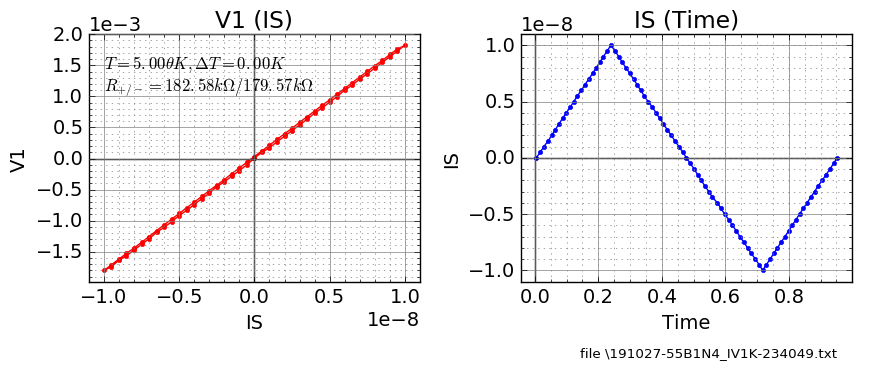

In [618]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191027-55B1N4_IV1K-234049.txt')

### Device #4

#### Measure N4 after condensation (not T_base yet)
- It shows pretty much IVc affected by noise either due to TASP or electronic noise from noisy source KE6220. (T8=300mK)

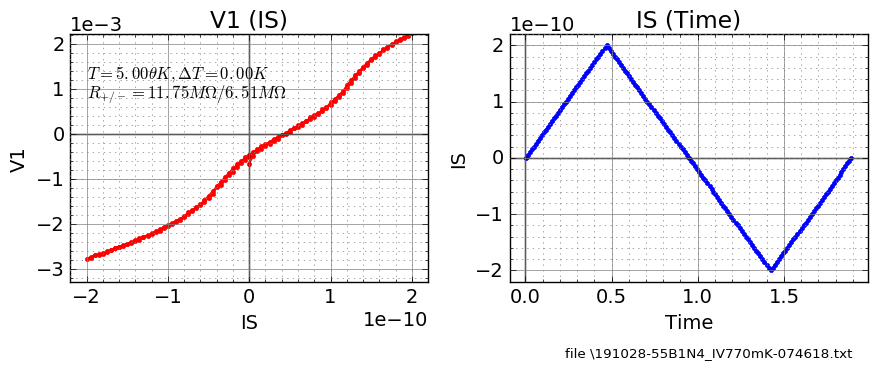

In [619]:
# Source: 6220
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191028-55B1N4_IV770mK-074618.txt')

#### Fixed the comm issue to AWG and be able to measure under DC biasing

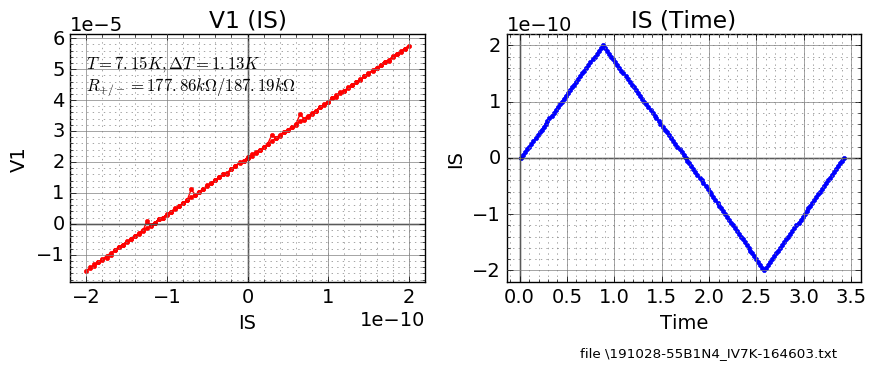

In [620]:
# Source: AWG
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191028-55B1N4_IV7K-164603.txt')

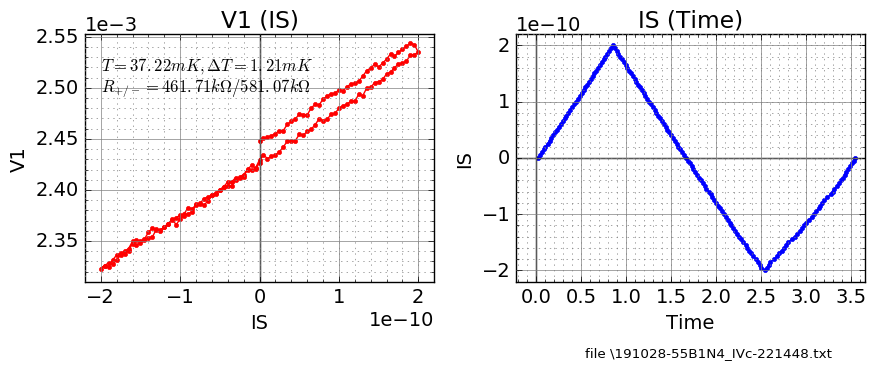

In [621]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191028-55B1N4_IVc-221448.txt')

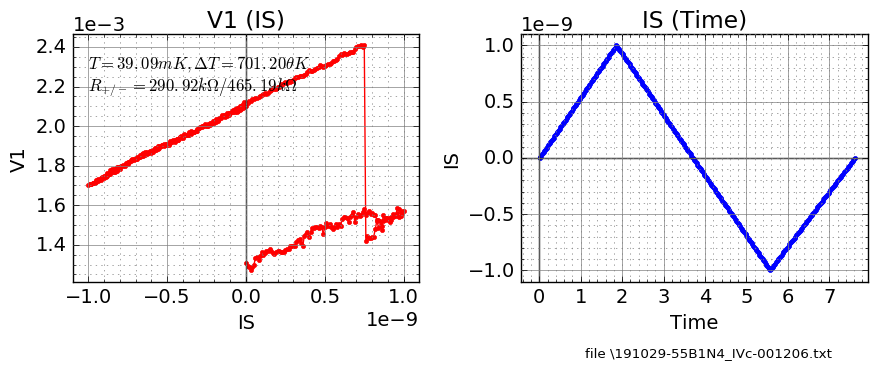

In [622]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-001206.txt')

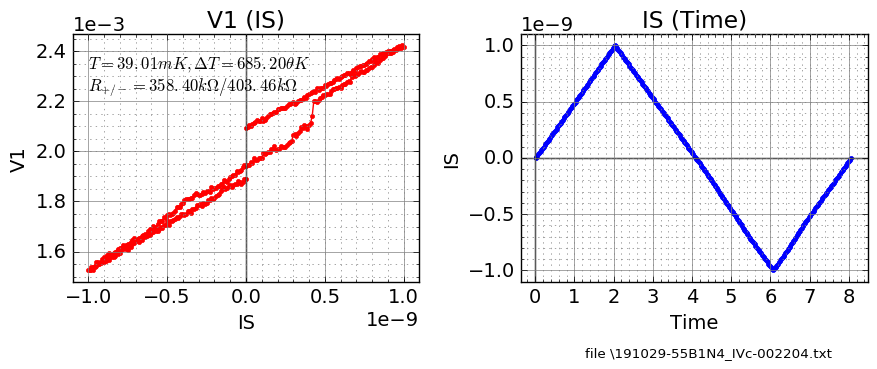

In [623]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-002204.txt')

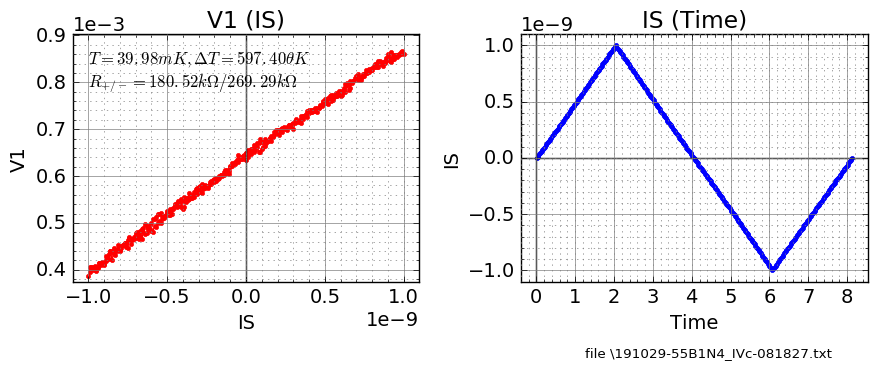

In [624]:
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-081827.txt')

>>> ***The data is quite unstable. We can even see the level wasn't at the same place.***

- check if preamp was saturated: No, during the whole process the preamp is ok
- try battery power
- check $R_{2pb}$: $180k\Omega$, $R_G = 13M\Omega$
- try 6220

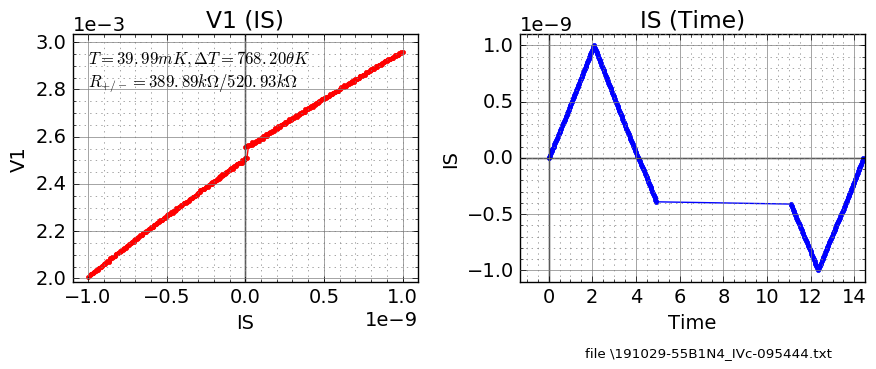

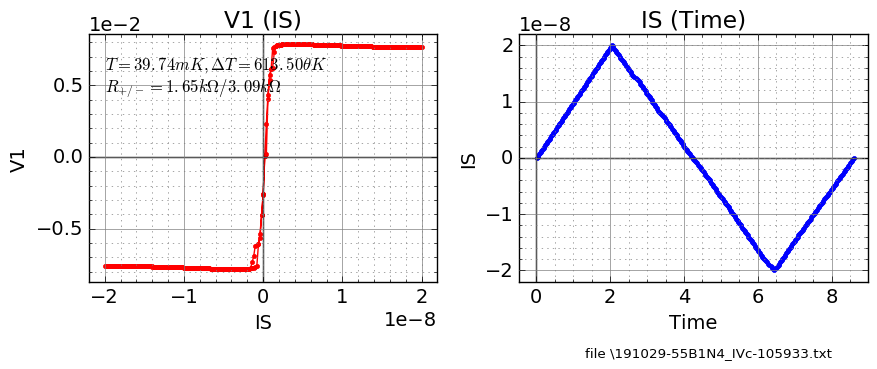

In [653]:
# double check after meas R2pb
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-095444.txt')
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-105933.txt')

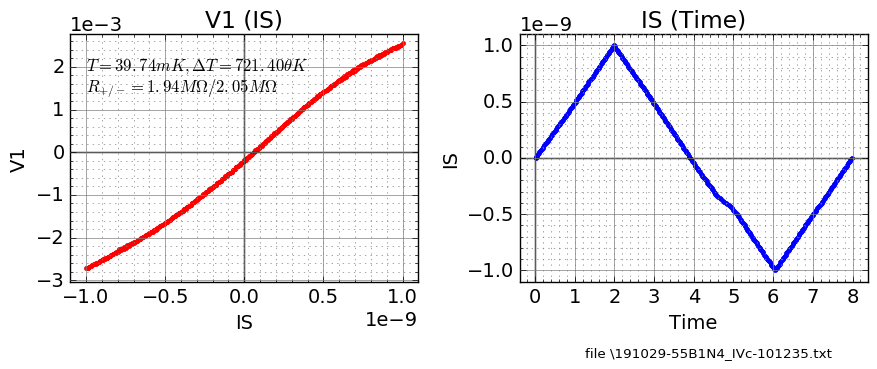

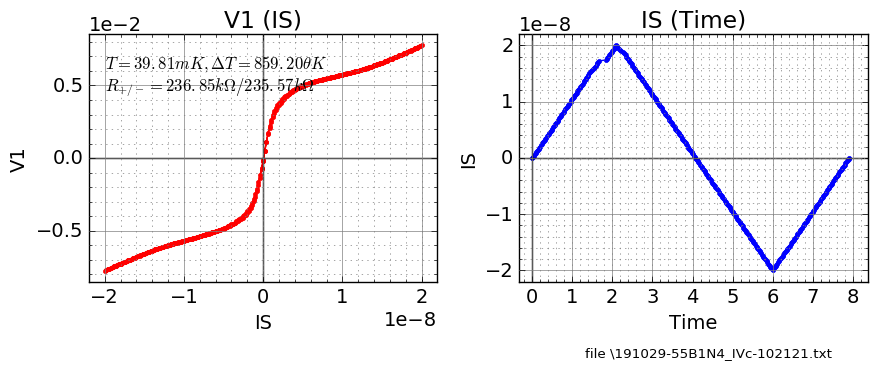

In [661]:
# Source: 6220
# The result took by 6220 seems to be more stable, while with greater noise.
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-101235.txt')
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\191029-55B1N4_IVc-102121.txt')

#### Check the previous run 

In [672]:
qckplt('\\JOSH-PC\OurData\wsLu\RawData\DC\\191029-55B1N4_IVc-112415.txt')

FileNotFoundError: [Errno 2] No such file or directory: '\\JOSH-PC\\OurData\\wsLu\\RawData\\DC\\191029-55B1N4_IVc-112415.txt'

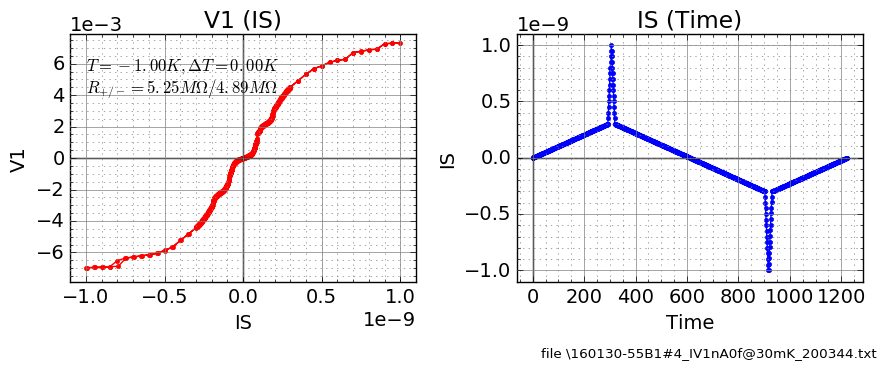

In [662]:
#Check the previous run
qckplt(r'\\JOSH-PC\OurData\wsLu\RawData\DC\160130-55B1#4_IV1nA0f@30mK_200344.txt')

In [2]:
import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [3]:
def extract_Isw_R0_by_id (idx):
    
    alldata = get_data_by_id(idx)
    
    Is = alldata[0][0]['data']
    Vs = alldata[0][1]['data']

        
    return extract_Isw_R0 (Is,Vs)

In [1]:
def extract_Isw_R0 (Is,Vs):
    
        Isw = (np.max(Is) - np.min(Is) ) /2
        
        order = Is.argsort()
        
        Is, Vs = Is[order], Vs[order]
        
        n = len(Is)
        n_min, n_max = np.int(n/3), np.int(2*n/3)
        
        print(n_min, n_max)
          
        n_sl = slice(n_min, n_max)
        
        R0 = np.mean(np.diff(Vs[n_sl])) / np.mean(np.diff(Is[n_sl]))
        
        return Isw, R0

In [ ]:
SAMPLE = '55B1'

qc.config["core"]["db_location"] = r'E:\OneDrive - Rutgers University\files_py\expdata\Experiments_{}.db'.format(SAMPLE)
#